<a href="https://colab.research.google.com/github/Hyerinrin/AI-Lesson/blob/main/int_week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split,validation_curve,GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import time

digit=datasets.load_digits()
x_train,x_test,y_train,y_test=train_test_split(digit.data,digit.target,train_size=0.6)

#다층 퍼셉트론을 교차 검증으로 성능 평가(소요 시간 측정 포함)
start=time.time()

mlp=MLPClassifier(batch_size=32,max_iter=300,solver='sgd')

parameters = {'hidden_layer_sizes':[100,700], 'learning_rate_init':[0.001,0.01]}
gs= GridSearchCV(mlp, param_grid=parameters, cv=10, scoring="accuracy", n_jobs=4, verbose=2)#코어가 4게

gs.fit(x_train,y_train)

print('GridSearchCV 최적 하이퍼 파라미터:', gs.best_params_)
print('GridSearchCV 최적 하이퍼 파라미터:', gs.best_score_)
end=time.time()
print("하이퍼 매개변수 최적화에 걸린 시간은", end-start, "초입니다.")

mlp_best=gs.best_estimator_
mlp_best.fit(x_train,y_train)

res=mlp_best.predict(x_test)

conf=np.zeros((10,10))
for i in range(len(res)):
    conf[res[i]][y_test[i]]+=1
print(conf)

no_correct=0
for i in range(10):
    no_correct+=conf[i][i]
accuracy=no_correct/len(res)
print("테스트 집합에 대한 정확률은",accuracy*100,"입니다.")

Fitting 10 folds for each of 4 candidates, totalling 40 fits
GridSearchCV 최적 하이퍼 파라미터: {'hidden_layer_sizes': 700, 'learning_rate_init': 0.01}
GridSearchCV 최적 하이퍼 파라미터: 0.9833073727933541
하이퍼 매개변수 최적화에 걸린 시간은 84.1745765209198 초입니다.
[[71.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0. 77.  1.  0.  1.  0.  0.  0.  1.  0.]
 [ 0.  0. 79.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 65.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 74.  1.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0. 67.  0.  0.  1.  2.]
 [ 0.  0.  0.  0.  0.  0. 72.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 67.  0.  0.]
 [ 0.  1.  0.  1.  1.  0.  0.  0. 59.  1.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0. 74.]]
테스트 집합에 대한 정확률은 98.0528511821975 입니다.


In [ ]:
import tensorflow as tf

print(tf.__version__)
a=tf.random.uniform([2,3],0,1)
print(a)
print(type(a))

2.8.0
tf.Tensor(
[[0.39984965 0.669948   0.32895172]
 [0.625592   0.9492302  0.70135224]], shape=(2, 3), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [ ]:
import tensorflow as tf
import numpy as np

t=tf.random.uniform([2,3],0,1)
n=np.random.uniform(0,1,[2,3])

print("tensorflow로 생성한 텐서:\n",t,"\n")
print("numpy로 생성한 ndarray: \n",n,"\n")
res=t+n
print("덧셈결과:\n",res)

tensorflow로 생성한 텐서:
 tf.Tensor(
[[0.65814793 0.99057174 0.7435367 ]
 [0.7918749  0.44614875 0.1576829 ]], shape=(2, 3), dtype=float32) 

numpy로 생성한 ndarray: 
 [[0.29605437 0.29626244 0.60034054]
 [0.25395561 0.03348157 0.22809833]] 

덧셈결과:
 tf.Tensor(
[[0.9542023  1.2868342  1.3438773 ]
 [1.0458305  0.47963032 0.38578123]], shape=(2, 3), dtype=float32)


In [ ]:
import tensorflow as tf
import tensorflow.keras.datasets as ds

#MNIST 읽고 텐서 모양 출력
(x_train,y_train),(x_test,y_test)=ds.mnist.load_data()
yy_train=tf.one_hot(y_train,10,dtype=tf.int8)   #원핫 코드로 변환
print("MNIST:",x_train.shape,y_train.shape,yy_train.shape)

#CIFAR-10 읽고 텐서 모양 출력
(x_train,y_train),(x_test,y_test)=ds.cifar10.load_data()
yy_train=tf.one_hot(y_train,10,dtype=tf.int8)
print("CIFAR-10",x_train.shape,y_train.shape,yy_train.shape)

#Boston Housing 일고 텐서 모양 출력
(x_train,y_train),(x_test,y_test)=ds.boston_housing.load_data()
print("Boston Housing:",x_train.shape,y_train.shape)

#Reuters 읽고 텐서 모양 출력
(x_trian,y_train),(x_test,y_test)=ds.reuters.load_data()
print("Reuters:",x_train.shape,y_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
MNIST: (60000, 28, 28) (60000,) (60000, 10)
170508288/170498071 [==============================] - 2s 0us/step
CIFAR-10 (50000, 32, 32, 3) (50000, 1) (50000, 1, 10)
65536/57026 [==================================] - 0s 0us/step
Boston Housing: (404, 13) (404,)
2121728/2110848 [==============================] - 0s 0us/step
Reuters: (404, 13) (8982,)


In [ ]:
import tensorflow as tf

#OR데이터 구축
x=[[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
y=[[-1],[1],[1],[1]]

w=tf.Variable([[1.0],[1.0]])
b=tf.Variable(-0.5)

s=tf.add(tf.matmul(x,w),b)
o=tf.sign(s)

print(o)

tf.Tensor(
[[-1.]
 [ 1.]
 [ 1.]
 [ 1.]], shape=(4, 1), dtype=float32)


In [ ]:
import tensorflow as tf

x=[[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
y=[[-1],[1],[1],[1]]

w=tf.Variable(tf.random.uniform([2,1],-0.5,0.5))
b=tf.Variable(tf.zeros([1]))

opt=tf.keras.optimizers.SGD(learning_rate=0.1)

def forward():
    s=tf.add(tf.matmul(x,w),b)
    o=tf.tanh(s)
    return o
def loss():
    o=forward()
    return tf.reduce_mean((y-o)**2)

for i in range(500):
    opt.minimize(loss,var_list=[w,b])
    if(i%100==0):print('loss at epoch',i,'=',loss().numpy())

o=forward()
print(o)

loss at epoch 0 = 1.1307468
loss at epoch 100 = 0.09773635
loss at epoch 200 = 0.043758977
loss at epoch 300 = 0.027198125
loss at epoch 400 = 0.019474903
tf.Tensor(
[[-0.81497884]
 [ 0.8855746 ]
 [ 0.88554156]
 [ 0.99924916]], shape=(4, 1), dtype=float32)


In [ ]:
from tensorflow.keras.models import Sequential #층을 한 줄로 쌓늩데 사용, 신경망 만드는데 이용
from tensorflow.keras.layers import Dense #완전연결층, 모든 노드마다 연결이 되어있음
from tensorflow.keras.optimizers import SGD

x=[[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
y=[[-1],[1],[1],[1]]

#신경망 구조 설계
n_input=2
n_output=1

perceptron=Sequential() #Sequential클래스로 객체를 생성
perceptron.add(Dense(units=n_output,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
#↑add함수로 Dense(완전연결) 층을 쌓음, 아웃풋 노드수, 활성함수, 몇 개의 데이터가 들어오는지, 초기값 순으로

#신경망 학습
perceptron.compile(loss='mse',optimizer=SGD(learning_rate=0.1),metrics=['mse'])
perceptron.fit(x,y,epochs=500,verbose=2)

#학습된 신경망으로 예측
res=perceptron.predict(x)
print(res)

Epoch 1/500
1/1 - 1s - loss: 1.0143 - mse: 1.0143 - 572ms/epoch - 572ms/step
Epoch 2/500
1/1 - 0s - loss: 0.7586 - mse: 0.7586 - 7ms/epoch - 7ms/step
Epoch 3/500
1/1 - 0s - loss: 0.6458 - mse: 0.6458 - 11ms/epoch - 11ms/step
Epoch 4/500
1/1 - 0s - loss: 0.5907 - mse: 0.5907 - 6ms/epoch - 6ms/step
Epoch 5/500
1/1 - 0s - loss: 0.5577 - mse: 0.5577 - 6ms/epoch - 6ms/step
Epoch 6/500
1/1 - 0s - loss: 0.5341 - mse: 0.5341 - 5ms/epoch - 5ms/step
Epoch 7/500
1/1 - 0s - loss: 0.5151 - mse: 0.5151 - 6ms/epoch - 6ms/step
Epoch 8/500
1/1 - 0s - loss: 0.4987 - mse: 0.4987 - 5ms/epoch - 5ms/step
Epoch 9/500
1/1 - 0s - loss: 0.4838 - mse: 0.4838 - 5ms/epoch - 5ms/step
Epoch 10/500
1/1 - 0s - loss: 0.4699 - mse: 0.4699 - 5ms/epoch - 5ms/step
Epoch 11/500
1/1 - 0s - loss: 0.4568 - mse: 0.4568 - 6ms/epoch - 6ms/step
Epoch 12/500
1/1 - 0s - loss: 0.4442 - mse: 0.4442 - 6ms/epoch - 6ms/step
Epoch 13/500
1/1 - 0s - loss: 0.4321 - mse: 0.4321 - 6ms/epoch - 6ms/step
Epoch 14/500
1/1 - 0s - loss: 0.4205 - ms

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

#데이터 준비
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0 #ndarray로 변환
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10) #원핫 코드로 변환
y_test=tf.keras.utils.to_categorical(y_test,10)

#신경망 구조 설계
n_input=784
n_hidden=1024
n_output=10

mlp=Sequential()
mlp.add(Dense(units=n_hidden,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_output,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))

#신경망 학습
mlp.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist=mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

#예측
res=mlp.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

Epoch 1/30
469/469 - 2s - loss: 0.0426 - accuracy: 0.8453 - val_loss: 0.0277 - val_accuracy: 0.9122 - 2s/epoch - 4ms/step
Epoch 2/30
469/469 - 1s - loss: 0.0223 - accuracy: 0.9281 - val_loss: 0.0177 - val_accuracy: 0.9421 - 1s/epoch - 2ms/step
Epoch 3/30
469/469 - 1s - loss: 0.0165 - accuracy: 0.9469 - val_loss: 0.0154 - val_accuracy: 0.9504 - 1s/epoch - 2ms/step
Epoch 4/30
469/469 - 1s - loss: 0.0138 - accuracy: 0.9570 - val_loss: 0.0128 - val_accuracy: 0.9585 - 1s/epoch - 2ms/step
Epoch 5/30
469/469 - 1s - loss: 0.0121 - accuracy: 0.9630 - val_loss: 0.0119 - val_accuracy: 0.9613 - 1s/epoch - 2ms/step
Epoch 6/30
469/469 - 1s - loss: 0.0111 - accuracy: 0.9671 - val_loss: 0.0110 - val_accuracy: 0.9625 - 1s/epoch - 2ms/step
Epoch 7/30
469/469 - 1s - loss: 0.0102 - accuracy: 0.9706 - val_loss: 0.0108 - val_accuracy: 0.9658 - 1s/epoch - 2ms/step
Epoch 8/30
469/469 - 1s - loss: 0.0096 - accuracy: 0.9735 - val_loss: 0.0105 - val_accuracy: 0.9687 - 1s/epoch - 2ms/step
Epoch 9/30
469/469 - 1s 

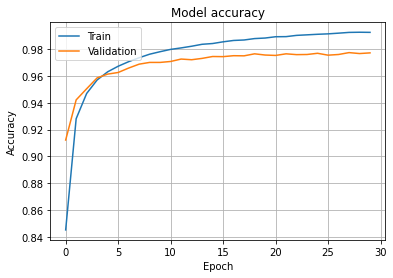

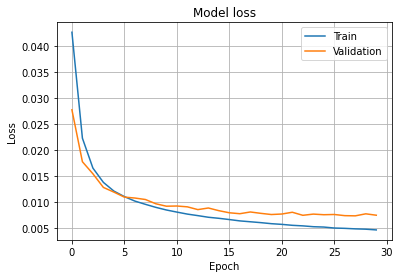

In [ ]:
import matplotlib.pyplot as plt

#정확률 곡선
plt.plot(hist.history['accuracy']) #.plot() 선그려주는 메소드
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy') 
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.grid() #격자 배경
plt.show()

#손실함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper right')
plt.grid()
plt.show()